In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from tqdm import tqdm

from scipy.stats import gaussian_kde
from scipy import signal

In [2]:
import hrv_analysis as hrv

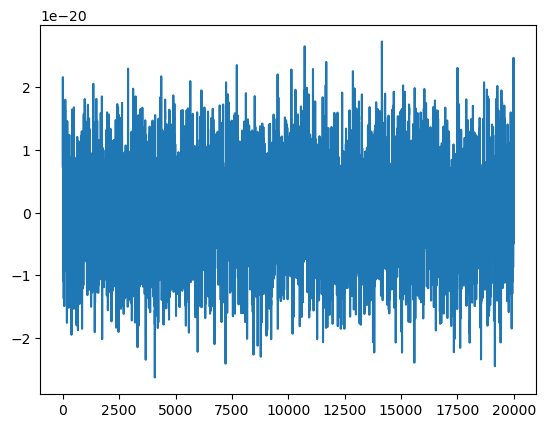

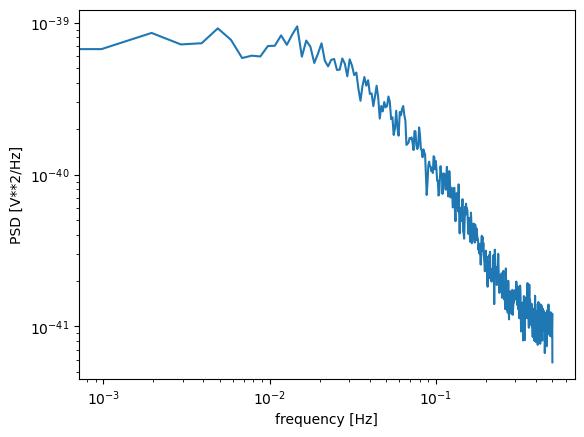

0.009952691019644995
1.4367973417213617e-26


In [3]:
N = 20000
k = 0.2
d = 1
T = 300
stationary_model_data = hrv.brownian_motion_with_restoring_force(N, k, d, T, 1, verbose = False)

plt.plot(range(len(stationary_model_data)), stationary_model_data)
plt.show()

# Compute the PSD using welch's method
f, Pxx = signal.welch(stationary_model_data, fs=1, nperseg=1024)

plt.semilogy(f, Pxx)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.xscale("log")
plt.show()

k_b = 1.38e-23
mu = 1.43e-26
w_c = (mu * k_b * T) / (np.mean(stationary_model_data) ** 2)
print(w_c)
mu = ((0.01 * (np.mean(stationary_model_data) ** 2)))  / (k_b * T)
print(mu)


100%|██████████| 100/100 [00:11<00:00,  8.58it/s]


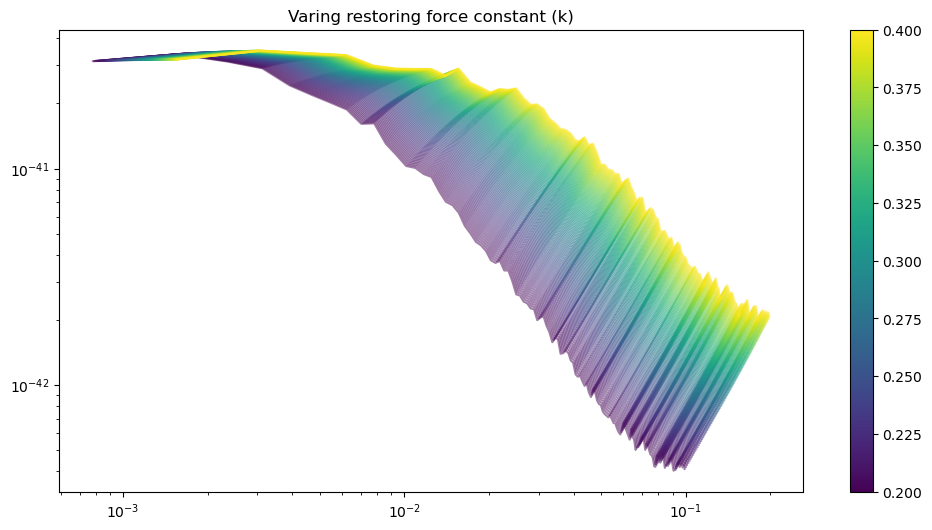

100%|██████████| 100/100 [00:11<00:00,  9.02it/s]


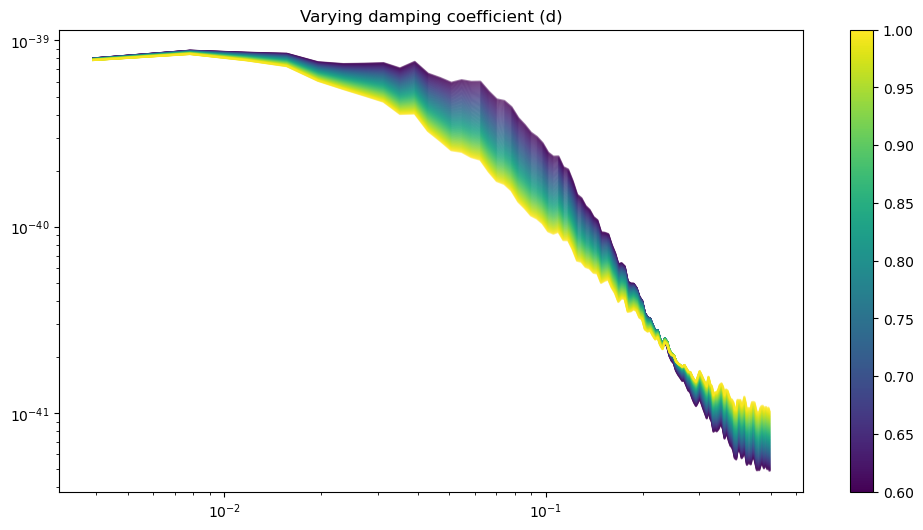

100%|██████████| 100/100 [00:13<00:00,  7.55it/s]


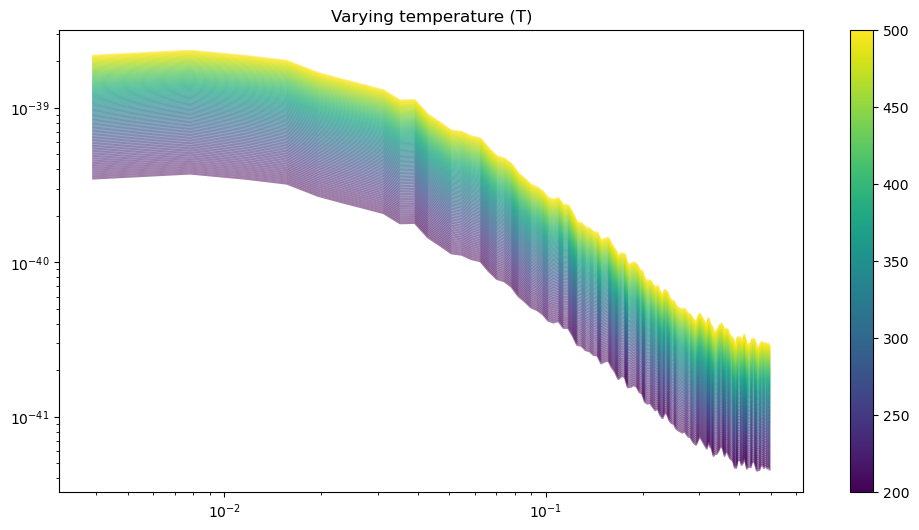

In [4]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
cmap = cm.viridis

N = 50000
k = 0.2
d = 1
T = 300
ks = np.linspace(0.2, 0.4, 100)
ds = np.linspace(0.6, 1, 100)
Ts = np.linspace(200, 500, 100)

norm = Normalize(vmin=np.min(ks), vmax=np.max(ks))
plt.figure(figsize = (12,6))
plt.title("Varing restoring force constant (k)")
for k in tqdm(ks):
    stationary_model_data = hrv.brownian_motion_with_restoring_force(N, k, d, T*k, 1, verbose = False)

    frequencies, power = scipy.signal.welch(stationary_model_data, fs=1)

    plt.semilogy(frequencies[1:-1] * k, power[1:-1], c = cmap(norm(k)), alpha = 0.5)
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap))
plt.xscale("log")
plt.show()

k = 0.2
d = 1
T = 300

norm = Normalize(vmin=np.min(ds), vmax=np.max(ds))
plt.figure(figsize = (12,6))
plt.title("Varying damping coefficient (d)")
for d in tqdm(ds):
    stationary_model_data = hrv.brownian_motion_with_restoring_force(N, k, d, T, 1, verbose = False)

    frequencies, power = scipy.signal.welch(stationary_model_data, fs=1)

    plt.semilogy(frequencies[1:-1], power[1:-1], c = cmap(norm(d)), alpha = 0.5)
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap))
plt.xscale("log")
plt.show()

k = 0.2
d = 1
T = 300

norm = Normalize(vmin=np.min(Ts), vmax=np.max(Ts))
plt.figure(figsize = (12,6))
plt.title("Varying temperature (T)")
for T in tqdm(Ts):
    stationary_model_data = hrv.brownian_motion_with_restoring_force(N, k, d, T, 1, verbose = False)

    frequencies, power = scipy.signal.welch(stationary_model_data, fs=1)

    plt.semilogy(frequencies[1:-1], power[1:-1], c = cmap(norm(T)), alpha = 0.5)
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap))
plt.xscale("log")
plt.show()

100%|██████████| 40000/40000 [00:00<00:00, 442562.01it/s]


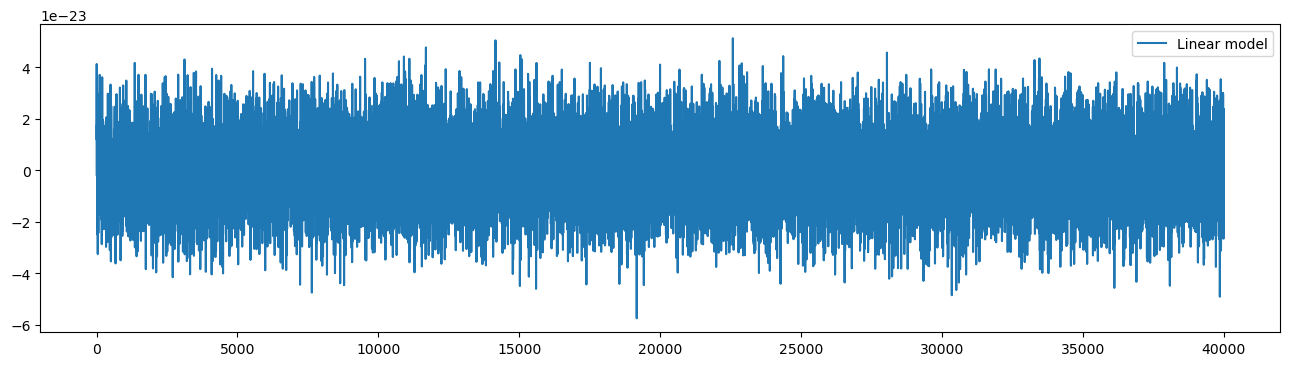

C:\Users\kross\AppData\Local\Temp\ipykernel_9668\196952118.py:20: RuntimeWarning: divide by zero encountered in log
  frequencies_log = np.log(frequencies)


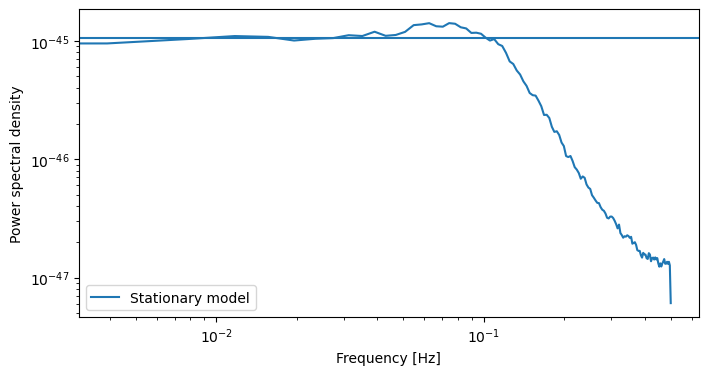

In [5]:
N = 40000

stationary_model_data = hrv.brownian_motion_with_restoring_force(N, 0.3, 0.5, 0.5, 1)

plt.figure(figsize = (16,4))
plt.plot(range(len(stationary_model_data)), stationary_model_data, label = "Linear model")
plt.legend()
plt.show()

# Compute the power spectral density
frequencies, power = scipy.signal.welch(stationary_model_data, fs=1)

plt.figure(figsize = (8,4))
plt.semilogy(frequencies, power, label = "Stationary model")
plt.legend()
plt.xscale("log")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power spectral density")

frequencies_log = np.log(frequencies)
power_log = np.log(power)


def optimise_line(offset):
    return np.sum(np.abs(power_log[1:10] - offset)**2)

from scipy.optimize import minimize

res = minimize(optimise_line, 1.8)

plt.axhline(np.exp(res.x))
plt.show()

100%|██████████| 400/400 [00:00<00:00, 199990.65it/s]


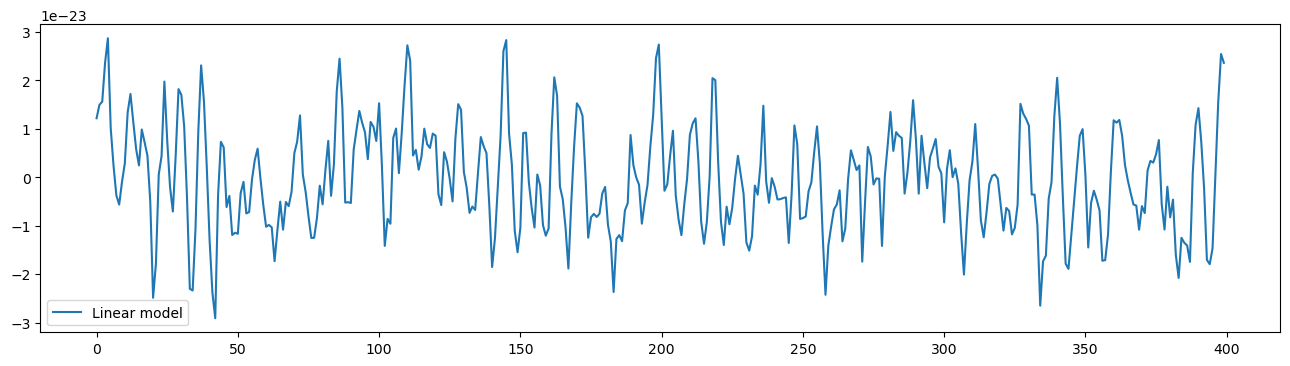

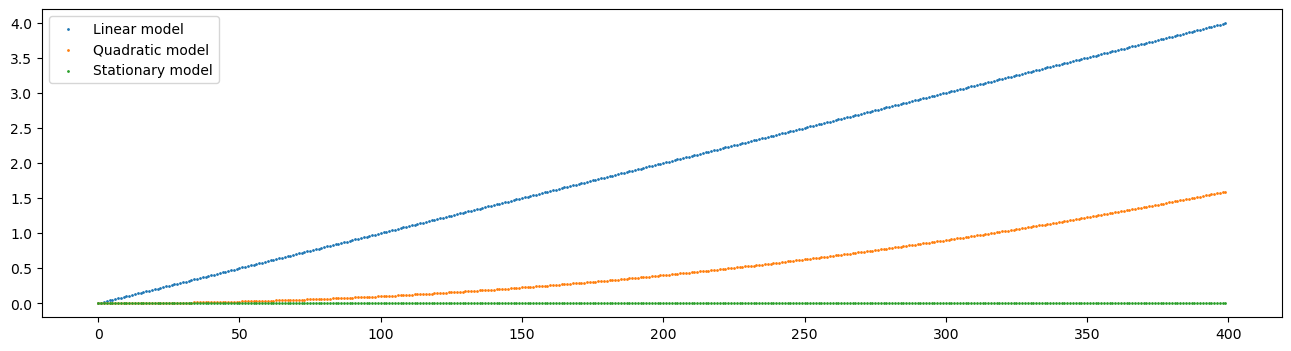

In [6]:
N = 400

linear_model_data = hrv.brownian_motion_with_restoring_force(N, 0.5, 0.5, 0.5, 1, restoring_force_model=lambda x: 0.01*x)
quadratic_model_data = hrv.brownian_motion_with_restoring_force(N, 0.5, 0.5, 0.5, 1, restoring_force_model=lambda x: 0.00001*x**2)
stationary_model_data = hrv.brownian_motion_with_restoring_force(N, 0.5, 0.5, 0.5, 1)

plt.figure(figsize = (16,4))
plt.plot(range(len(stationary_model_data)), stationary_model_data, label = "Linear model")
plt.legend()
plt.show()

plt.figure(figsize = (16,4))
plt.scatter(range(len(linear_model_data)), linear_model_data, s = 1, label = "Linear model")
plt.scatter(range(len(quadratic_model_data)), quadratic_model_data, s = 1, label = "Quadratic model")
plt.scatter(range(len(stationary_model_data)), stationary_model_data, s = 1, label = "Stationary model")
plt.legend()
plt.show()

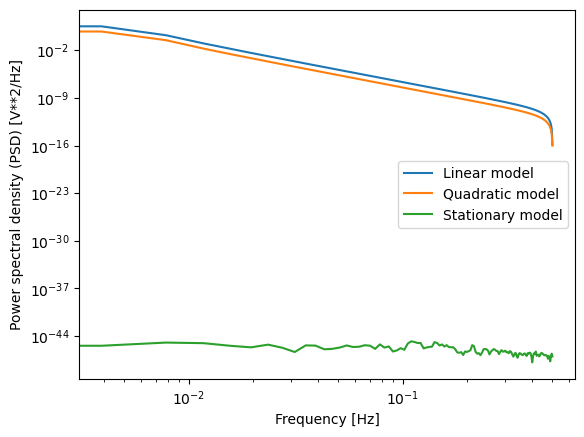

In [7]:
# Get the power spectral density of the data
frequencies, linear_model_psd = signal.welch(linear_model_data, fs=1)
frequencies, quadratic_model_psd = signal.welch(quadratic_model_data, fs=1)
frequencies, stationary_model_psd = signal.welch(stationary_model_data, fs=1)

plt.semilogy(frequencies, linear_model_psd, label = "Linear model")
plt.semilogy(frequencies, quadratic_model_psd, label = "Quadratic model")
plt.semilogy(frequencies, stationary_model_psd, label = "Stationary model")
plt.xscale("log")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power spectral density (PSD) [V**2/Hz]")
plt.legend()
plt.show()

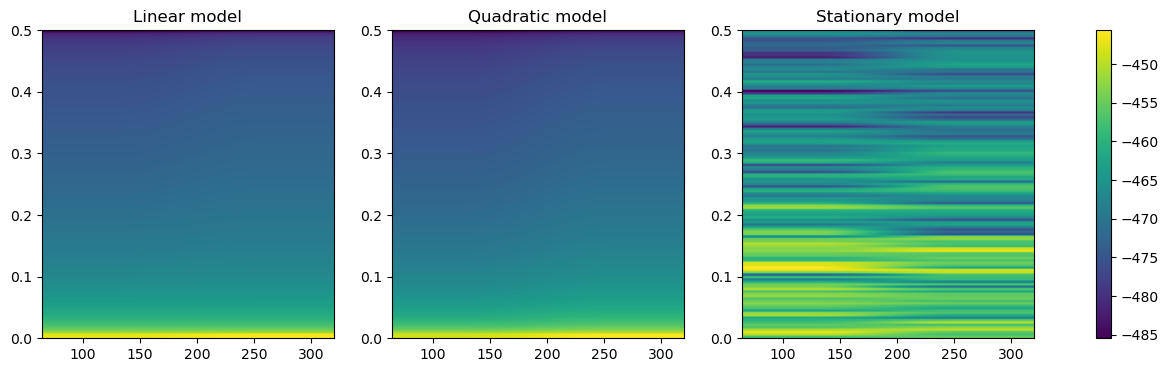

In [8]:
import matplotlib

# Plot spectrogram on log scale using subplots for each of our models
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs[0].specgram(linear_model_data, Fs=1, cmap='viridis')
axs[1].specgram(quadratic_model_data, Fs=1, cmap='viridis')
_, _, _, im = axs[2].specgram(stationary_model_data, Fs=1, cmap='viridis')
axs[0].set_title('Linear model')
axs[1].set_title('Quadratic model')
axs[2].set_title('Stationary model')
fig.colorbar(im, ax=axs.ravel().tolist())
plt.show()

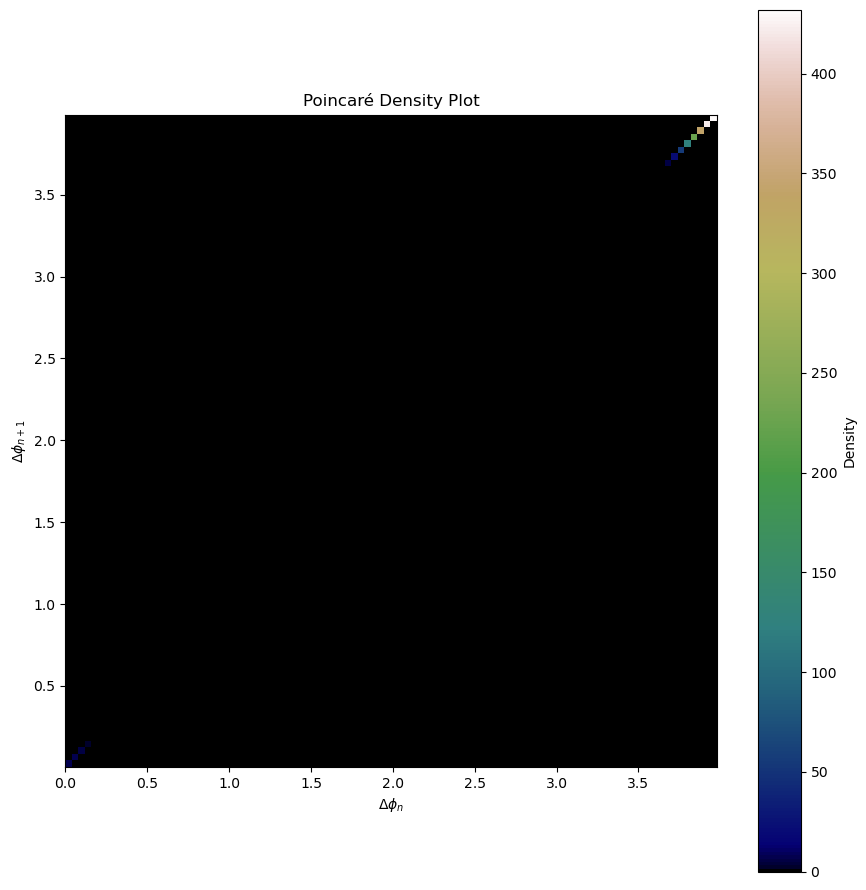

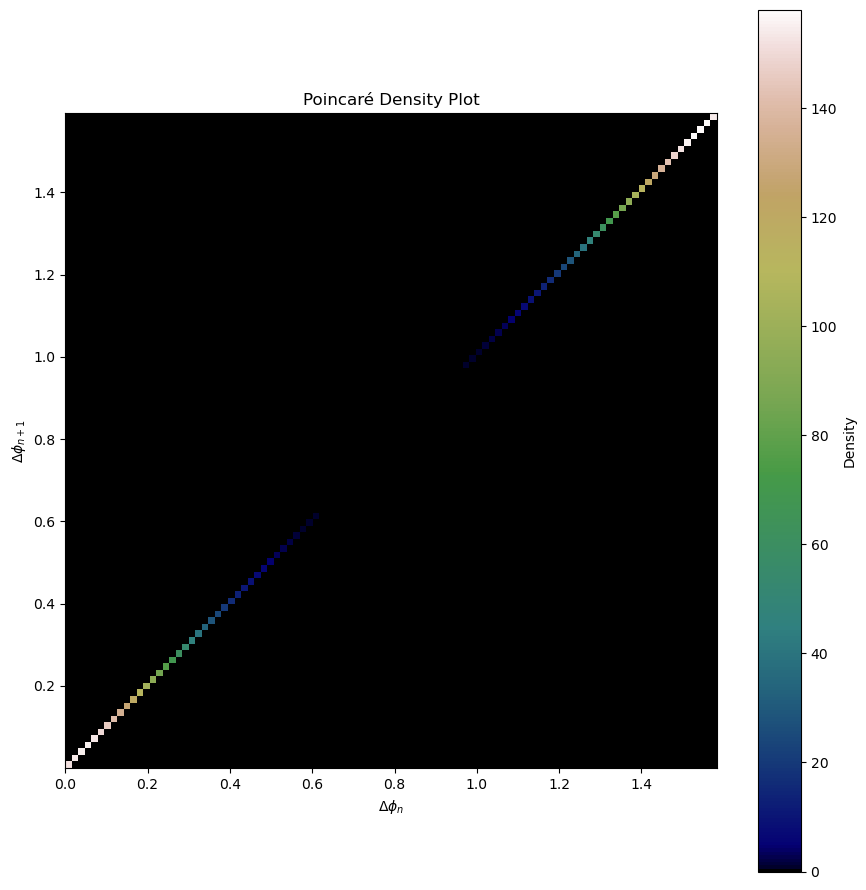

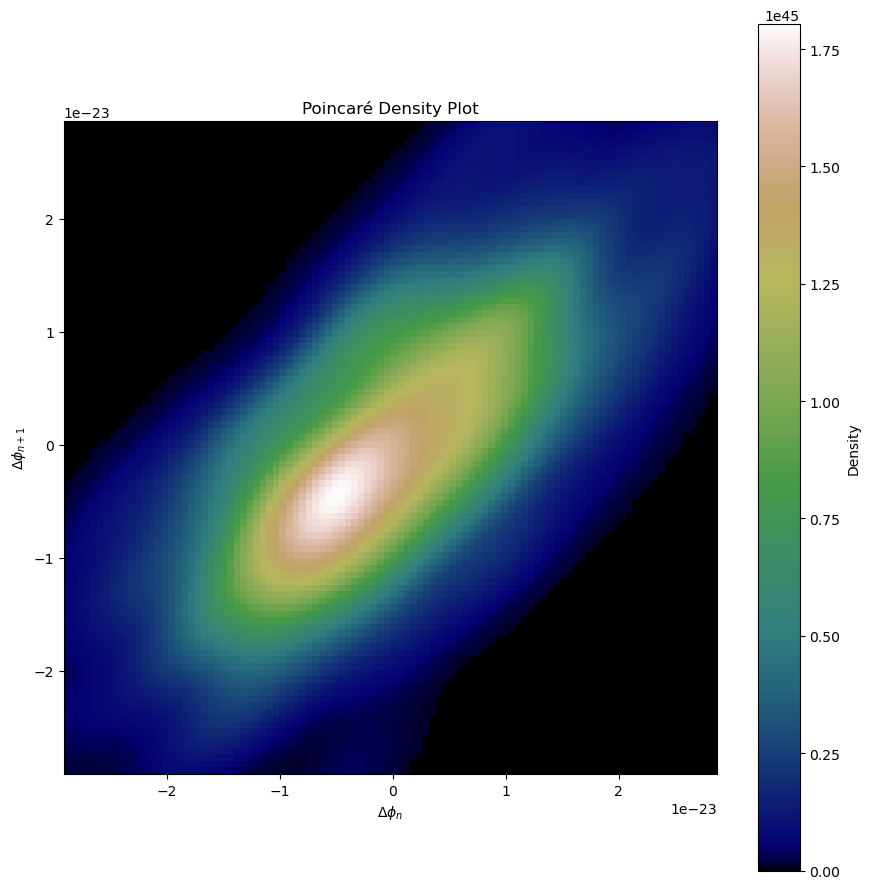

In [9]:
hrv.poincare_plot(linear_model_data)
hrv.poincare_plot(quadratic_model_data)
hrv.poincare_plot(stationary_model_data)